use this link to do fruit recognition
https://analyticsindiamag.com/fruit-recognition-using-the-convolutional-neural-network/#:~:text=In%20this%20article%2C%20we%20will,the%20output%20of%20the%20network.

In [1]:
#load neceaary library
#Importing Library
import numpy as np
import pandas as pd
import cv2
import os 
from PIL import Image

In [2]:
#Check the files in the directory
for dirname, _, filenames in os.walk('/Users/yongpengfu/Desktop/Fruit Recognition Image', topdown=True):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongpengfu/Desktop/Fruit Recognition Image/.DS_Store
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/.DS_Store
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/apple_49.xml
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/apple_75.xml
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/apple_61.xml
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/apple_75.jpg
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/apple_61.jpg
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/apple_49.jpg
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/orange_3.jpg
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/orange_3.xml
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/orange_28.jpg
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/banana_50.jpg
/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train/orange_14.jp

We can verify the contents of the directory in this way. Using the below code snippet, we will get all the images and their labels. These labels will be obtained from the names of the image files.
Pixel: This is the smallest building block of your screen. Resolution: This is refers to the size of the pixel. The smaller the pixel, the higher the resolution. ... PPI: (or Pixels Per Inch) This is the number of square pixels that show up in an inch of a digital screen.

In [3]:
images  =  []       
labels  =  [] 
train_path  =  '/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train'
for filename in os.listdir('/Users/yongpengfu/Desktop/Fruit Recognition Image/train_zip/train'):
    if filename.split('.')[1]  == 'jpg':
        img  =  cv2.imread(os.path.join(train_path,filename))
        #img will have a shape of (349, 349, 3)
        arr = Image.fromarray(img,'RGB')
        #This resizes the given image to (50, 50)
        '''This script will resize an image (somepic.jpg) using PIL (Python Imaging Library) 
        to a width of 300 pixels and a height proportional to the new width. 
        It does this by determining what percentage 300 pixels 
        is of the original width (img.size[0]) and then multiplying 
        the original height (img.size[1]) by that percentage. 
        Change "basewidth" to any other number to change the default width of your images.
        '''
        img_arr = arr.resize((50,50))
        labels.append(filename.split('_')[0])
        #total 240 images appended
        images.append(np.array(img_arr))

After obtaining all the labels, we will print them.

In [4]:
#Image Labels
np.unique(labels)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

All the labels in the text form stored in the labels array will be encoded by label encoding to transform them as the output labels.

In [5]:
from sklearn.preprocessing import LabelEncoder
lb_encod  =  LabelEncoder()
labels = pd.DataFrame(labels)
labels = lb_encod.fit_transform(labels[0])
labels

array([0, 0, 0, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 0, 0, 0, 0, 0, 1, 1, 3, 3,
       1, 1, 3, 0, 0, 0, 3, 0, 1, 3, 1, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3,
       3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 0, 0, 0, 0, 2, 1, 1, 3, 3, 1, 3, 1,
       2, 0, 1, 0, 0, 2, 2, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 2, 0, 0, 1, 0,
       0, 2, 1, 3, 1, 3, 3, 1, 3, 1, 3, 2, 2, 0, 0, 0, 2, 3, 1, 1, 1, 3,
       1, 3, 2, 0, 0, 0, 1, 2, 1, 3, 3, 3, 3, 1, 2, 1, 0, 0, 0, 2, 1, 3,
       3, 1, 3, 3, 1, 3, 3, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 3, 3, 1, 1,
       1, 3, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 3, 1, 3, 3, 1, 3, 2, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0,
       1, 3, 1, 3, 3, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 0, 0, 0, 0, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 0, 0, 0])

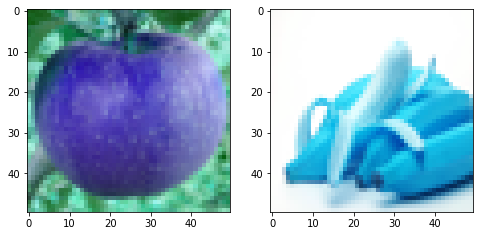

In [6]:
#Visualizing image
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (8,8))
# "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
ax = figure.add_subplot(121)
ax.imshow(images[0])
bx = figure.add_subplot(122)
bx.imshow(images[60])
plt.show()

In [7]:
#In the next step, we will preprocess the image data
#Saving the image array and corresponding labels
#Image was a list, so I transfer it to an array
images = np.array(images)
#numpy.save()function is used to store the input array in a disk file with npy extension(.npy).
np.save("/Users/yongpengfu/Desktop/image",images)
np.save("/Users/yongpengfu/Desktop/labels",labels)

#Loading the images and labels that we have saved above
'''Python pickle module is used for serializing and de-serializing 
a Python object structure. Any object in Python can be pickled so that 
it can be saved on disk. What pickle does is that it “serializes” the 
object first before writing it to file. Pickling is a way to convert 
a python object (list, dict, etc.) into a character stream. 
The idea is that this character stream contains all the information 
necessary to reconstruct the object in another python script.
'''
image = np.load("/Users/yongpengfu/Desktop/image.npy",allow_pickle = True)
labels = np.load("/Users/yongpengfu/Desktop/labels.npy",allow_pickle = True)

img_shape  = np.arange(image.shape[0])
np.random.shuffle(img_shape)
image = image[img_shape]
labels = labels[img_shape]

Reading the Dataset
Read and prepare your dataset.
Divide your dataset into training and test set:
70% training set; and
30% Testing set.

In [16]:
num_classes = len(np.unique(labels))
len_data = len(image)

x_train, x_test = image[(int)(0.3*len_data):],image[:(int)(0.3*len_data)]
y_train,y_test = labels[(int)(0.3*len_data):],labels[:(int)(0.3*len_data)]

from tensorflow import keras
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

Define your Convolutional Neural Network
Define a CNN with the following layers:
The input layer is a 2-D convolutional layer with the following parameters:
16 units;
convolution window size: 2 x 2;
Activation function: relu;
Input shape: 100 x 100 x 3; and
A 2-D max pooling layer with pool size of 2x2.
A 2-D convolutional layer with the following parameters:
32 units;
Convolution window size: 2 x 2;
Activation function: relu; and
A 2-D max pooling layer with pool size of 2x2.
Two 2-D convolutional layers, each with the following parameters:
64 units;
Convolution window size: 2 x 2
Activation function: relu;
A 2-D max pooling layer with pool size of 2x2;
A Dropout layer with 0.3 rate; and
A flattening layer.
A fully-connected layer with:
150 units;
Activation function: relu; and
A Dropout layer with 0.4 rate.
The output layer is a fully-connected layer with:
81 units; and
Activation function: softmax.

In [27]:
from tensorflow.keras.models import Sequential
model = Sequential()
from tensorflow.keras.layers import Conv2D
model.add(Conv2D(16, (2, 2), input_shape = (50, 50, 3), activation = 'relu'))
from tensorflow.keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (2, 2),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (2, 2),activation = 'relu'))
model.add(Conv2D(64, (2, 2),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
from tensorflow.keras.layers import Dropout
model.add(Dropout(0.3))
from tensorflow.keras.layers import Flatten
model.add(Flatten())
from tensorflow.keras.layers import Dense
model.add(Dense(units=150, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units=4, activation = 'softmax'))

Choosing Hyper-Parameters
Build the network using the following parameters:
Optimizer: rmsprop;
Loss Function: categorical_crossentropy;
Metrics: accuracy;
Batch size: 32; and
Epochs: 30.

In [28]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
6/6 [==============================] - 0s 21ms/step - loss: 27.0485 - accuracy: 0.3571
Epoch 2/30
6/6 [==============================] - 0s 17ms/step - loss: 3.7808 - accuracy: 0.4345
Epoch 3/30
6/6 [==============================] - 0s 17ms/step - loss: 1.9538 - accuracy: 0.5655
Epoch 4/30
6/6 [==============================] - 0s 17ms/step - loss: 1.4184 - accuracy: 0.5476
Epoch 5/30
6/6 [==============================] - 0s 17ms/step - loss: 0.9550 - accuracy: 0.7083
Epoch 6/30
6/6 [==============================] - 0s 17ms/step - loss: 1.1106 - accuracy: 0.6488
Epoch 7/30
6/6 [==============================] - 0s 17ms/step - loss: 0.9190 - accuracy: 0.6429
Epoch 8/30
6/6 [==============================] - 0s 17ms/step - loss: 0.6010 - accuracy: 0.7679
Epoch 9/30
6/6 [==============================] - 0s 17ms/step - loss: 0.7093 - accuracy: 0.7679
Epoch 10/30
6/6 [==============================] - 0s 17ms/step - loss: 0.8461 - accuracy: 0.7738
Epoch 11/30
6/6 [===========

In [29]:
loss, accuracy = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 1.1816 - accuracy: 0.7500
